In [3]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [4]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00


In [5]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.9 MB/s eta 0:00:00


In [6]:
#Import dependencies 

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Read-in the CSV file
sentiment_data = pd.read_csv('0819_UkraineCombinedTweetsDeduped.csv')

In [8]:
# View the dataframe

sentiment_data.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,0,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:07:26.836769
1,1,335041409,XclusivasPuebla,Somos el periódico #ExclusivasPuebla| Investi...,"Puebla, México",1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 07:51:50.523048
2,2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 05:12:06.194216
3,3,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:22:26.824532
4,4,20297125,ElMananaOnline,Las mejores noticias de los dos Laredos y el m...,Nuevo Laredo,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:52:29.448634


In [9]:
#View the details of the dataframe

sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47994 entries, 0 to 47993
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               47994 non-null  int64  
 1   userid                   47994 non-null  int64  
 2   username                 47994 non-null  object 
 3   acctdesc                 43037 non-null  object 
 4   location                 31703 non-null  object 
 5   following                47994 non-null  int64  
 6   followers                47994 non-null  int64  
 7   totaltweets              47994 non-null  int64  
 8   usercreatedts            47994 non-null  object 
 9   tweetid                  47994 non-null  int64  
 10  tweetcreatedts           47994 non-null  object 
 11  retweetcount             47994 non-null  int64  
 12  text                     47994 non-null  object 
 13  hashtags                 47994 non-null  object 
 14  language              

In [10]:
#Drop columns with null values

text_df = sentiment_data.drop(['original_tweet_userid', 'acctdesc', 'location', 'coordinates', 'original_tweet_username', 'in_reply_to_status_id', 'in_reply_to_user_id','in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id', 'quoted_status_userid',
       'quoted_status_username'], axis=1)
text_df.head()

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,original_tweet_id,extractedts
0,0,173212647,JoeMokolobetsi,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0,False,0,2022-08-19 08:07:26.836769
1,1,335041409,XclusivasPuebla,1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0,False,0,2022-08-19 07:51:50.523048
2,2,1512400441103032323,ShelterAnimalUA,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1,False,0,2022-08-19 05:12:06.194216
3,3,1356632630662430722,DogandCatHelpe1,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2,False,0,2022-08-19 11:22:26.824532
4,4,20297125,ElMananaOnline,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0,False,0,2022-08-19 11:52:29.448634


In [11]:
text_df.shape

(47994, 17)

In [12]:
list(text_df.columns)

['Unnamed: 0',
 'userid',
 'username',
 'following',
 'followers',
 'totaltweets',
 'usercreatedts',
 'tweetid',
 'tweetcreatedts',
 'retweetcount',
 'text',
 'hashtags',
 'language',
 'favorite_count',
 'is_retweet',
 'original_tweet_id',
 'extractedts']

In [13]:
text = text_df['text']
text

0        Dear vaccine advocate\n\nDo take the COVID19 m...
1        #Mundo \n\nAl menos 6 muertos y 16 heridos en ...
2        Animal shelter Dogs and Cats, we need your hel...
3        Welcome to our shelter!\nLocated in Ukraine, K...
4        Tensión, debido a que #Rusia sigue en pie en l...
                               ...                        
47989    Everything as usual, just another russian gove...
47990                   @dosnostalgic twisted firestarter!
47991    La ruleta Ep. 7: #Ucrania: Presidente Zelensky...
47992    La ruleta Ep. 7: #Ucrania: Presidente Zelensky...
47993    When people say the US was in better shape whi...
Name: text, Length: 47994, dtype: object

In [14]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu 

#Mundo 

Al menos 6 muertos y 16 heridos en bombardeo ruso en #Kharkiv

https://t.co/AZzEgw2NLe 

Animal shelter Dogs and Cats, we need your help!
Raising funds food for animals.
PayPal: dogandcat.helper@gmail.com
https://t.co/Z3re0ItTfy
https://t.co/I9dbwRrtg0
https://t.co/71pErM8xBZ

#Ukraine #Patreon #dogsoftwitter #Shelter #Dogs #Cats #Cute #Pets #Funny
#Dogsarefamily https://t.co/HLEnTp9yk7 

Welcome to our shelter!
Located in Ukraine, Kyiv
Our shelter needs your help!
Raising funds food for animals.
PayPal: dogandcat.helper@gmail.com
https://t.co/RH0peqvaXT
https://t.co/rTtTVpoCi1

#Ukraine #Kyiv #Shelter #Dogs #Cats #Pets #DogsofTwittter #patreoncreator #Patreon https://t.co/rR

In [15]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47994 entries, 0 to 47993
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         47994 non-null  int64 
 1   userid             47994 non-null  int64 
 2   username           47994 non-null  object
 3   following          47994 non-null  int64 
 4   followers          47994 non-null  int64 
 5   totaltweets        47994 non-null  int64 
 6   usercreatedts      47994 non-null  object
 7   tweetid            47994 non-null  int64 
 8   tweetcreatedts     47994 non-null  object
 9   retweetcount       47994 non-null  int64 
 10  text               47994 non-null  object
 11  hashtags           47994 non-null  object
 12  language           47994 non-null  object
 13  favorite_count     47994 non-null  int64 
 14  is_retweet         47994 non-null  bool  
 15  original_tweet_id  47994 non-null  int64 
 16  extractedts        47994 non-null  objec

In [16]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
text_df.text = text_df['text'].apply(data_processing)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Christina/nltk_data'
    - 'C:\\Users\\Christina\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Christina\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Christina\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Christina\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [18]:
text_df = text_df.drop_duplicates('text')

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [21]:
text_df.head()

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,original_tweet_id,extractedts
0,0,173212647,JoeMokolobetsi,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0,False,0,2022-08-19 08:07:26.836769
1,1,335041409,XclusivasPuebla,1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0,False,0,2022-08-19 07:51:50.523048
2,2,1512400441103032323,ShelterAnimalUA,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1,False,0,2022-08-19 05:12:06.194216
3,3,1356632630662430722,DogandCatHelpe1,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2,False,0,2022-08-19 11:22:26.824532
4,4,20297125,ElMananaOnline,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0,False,0,2022-08-19 11:52:29.448634


In [22]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu 

#Mundo 

Al menos 6 muertos y 16 heridos en bombardeo ruso en #Kharkiv

https://t.co/AZzEgw2NLe 

Animal shelter Dogs and Cats, we need your help!
Raising funds food for animals.
PayPal: dogandcat.helper@gmail.com
https://t.co/Z3re0ItTfy
https://t.co/I9dbwRrtg0
https://t.co/71pErM8xBZ

#Ukraine #Patreon #dogsoftwitter #Shelter #Dogs #Cats #Cute #Pets #Funny
#Dogsarefamily https://t.co/HLEnTp9yk7 

Welcome to our shelter!
Located in Ukraine, Kyiv
Our shelter needs your help!
Raising funds food for animals.
PayPal: dogandcat.helper@gmail.com
https://t.co/RH0peqvaXT
https://t.co/rTtTVpoCi1

#Ukraine #Kyiv #Shelter #Dogs #Cats #Pets #DogsofTwittter #patreoncreator #Patreon https://t.co/rR

In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [24]:
text_df.head(10)

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,original_tweet_id,extractedts,polarity
0,0,173212647,JoeMokolobetsi,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0,False,0,2022-08-19 08:07:26.836769,0.050000
1,1,335041409,XclusivasPuebla,1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0,False,0,2022-08-19 07:51:50.523048,0.000000
2,2,1512400441103032323,ShelterAnimalUA,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1,False,0,2022-08-19 05:12:06.194216,0.375000
3,3,1356632630662430722,DogandCatHelpe1,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2,False,0,2022-08-19 11:22:26.824532,1.000000
4,4,20297125,ElMananaOnline,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0,False,0,2022-08-19 11:52:29.448634,0.000000
5,5,1453260685530603528,GermanyInSEAsia,129,2509,522,2021-10-27 07:22:46.000000,1560416258461298689,2022-08-19 00:00:01,0,👇 Good news you may have missed: First @WFP sh...,"[{'text': 'humanitarian', 'indices': [66, 79]}...",en,0,False,0,2022-08-19 05:12:06.096707,0.135714
6,6,15968273,Foxmental_X,6013,6546,308820,2008-08-24 12:06:19.000000,1560416263557505024,2022-08-19 00:00:03,0,Opinion: The Ukraine war is also being fought ...,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t...",en,0,False,0,2022-08-19 08:02:53.510769,0.000000
7,7,1499763123603050497,FuckPutinBot,14,202,229136,2022-03-04 15:06:25.000000,1560416269198934016,2022-08-19 00:00:04,0,"Ale Fuck tèt ou, Putin!\n(Haitian Creole)\n\n#...","[{'text': 'IStandWithUkraine', 'indices': [42,...",ht,0,False,0,2022-08-19 08:02:53.387825,-0.500000
8,8,916681683134447617,MilaPlayporn,19,8927,46452,2017-10-07 15:08:39.000000,1560416270914392065,2022-08-19 00:00:04,0,"Ethereum's spot setup looks grim, but derivati...","[{'text': 'cryptocurrency', 'indices': [79, 94...",en,1,False,0,2022-08-19 05:12:06.018650,-0.500000
9,9,224451350,mronzino,1312,665,37191,2010-12-09 01:37:17.000000,1560416272940236800,2022-08-19 00:00:05,0,"Artículo de #JeffreyDSachs. 👉 ""#Biden está lle...","[{'text': 'JeffreyDSachs', 'indices': [12, 26]...",es,0,False,0,2022-08-19 11:22:26.795610,0.000000


In [26]:
# define the categories of sentiments

def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [25]:
# create new column for sentiment label

text_df['sentiment'] = text_df['polarity'].apply(sentiment)

NameError: name 'sentiment' is not defined

In [26]:
# View the new dataframe 

text_df.head()

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,original_tweet_id,extractedts,polarity
0,0,173212647,JoeMokolobetsi,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0,False,0,2022-08-19 08:07:26.836769,0.050
1,1,335041409,XclusivasPuebla,1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0,False,0,2022-08-19 07:51:50.523048,0.000
2,2,1512400441103032323,ShelterAnimalUA,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1,False,0,2022-08-19 05:12:06.194216,0.375
3,3,1356632630662430722,DogandCatHelpe1,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2,False,0,2022-08-19 11:22:26.824532,1.000
4,4,20297125,ElMananaOnline,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0,False,0,2022-08-19 11:52:29.448634,0.000


In [27]:
# create a bargraph to show count of tweet sentiments

fig = plt.figure(figsize=(10,6))
sns.countplot(x='sentiment', data = text_df)

ValueError: Could not interpret input 'sentiment'

<Figure size 1000x600 with 0 Axes>

In [1]:
# Create a pie chart to display distribution of sentiments

fig = plt.figure(figsize=(7,7))
colors = ("blue", "green", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

NameError: name 'plt' is not defined

In [28]:
#create dataframe for positive tweets

positive_tweets = text_df[text_df.sentiment == 'Positive']
positive_tweets = positive_tweets.sort_values(['polarity'], ascending= False)
positive_tweets.head()

AttributeError: 'DataFrame' object has no attribute 'sentiment'

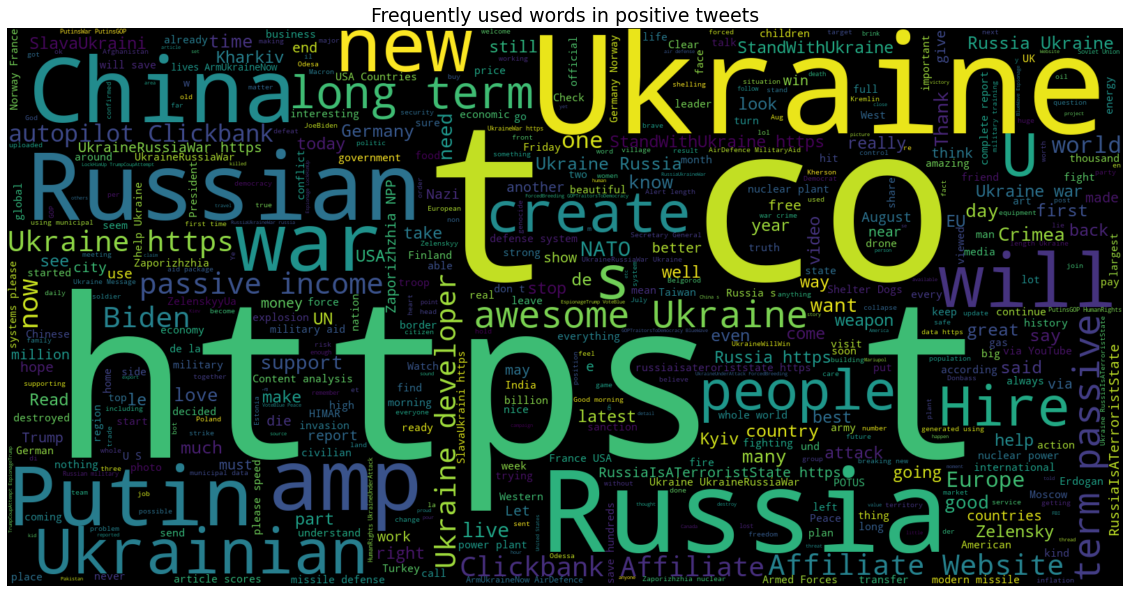

In [32]:
# Show the Frequently used words in the positive tweets

text = ' '.join([word for word in positive_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Frequently used words in positive tweets', fontsize=19)
plt.show()

In [33]:
#create dataframe for negative tweets

negative_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = negative_tweets.sort_values(['polarity'], ascending= False)
negative_tweets.head()

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,original_tweet_id,extractedts,polarity,sentiment
7,7,1499763123603050497,FuckPutinBot,14,202,229136,2022-03-04 15:06:25.000000,1560416269198934016,2022-08-19 00:00:04,0,"Ale Fuck tèt ou, Putin!\n(Haitian Creole)\n\n#...","[{'text': 'IStandWithUkraine', 'indices': [42,...",ht,0,False,0,2022-08-19 08:02:53.387825,-0.500,Negative
8,8,916681683134447617,MilaPlayporn,19,8927,46452,2017-10-07 15:08:39.000000,1560416270914392065,2022-08-19 00:00:04,0,"Ethereum's spot setup looks grim, but derivati...","[{'text': 'cryptocurrency', 'indices': [79, 94...",en,1,False,0,2022-08-19 05:12:06.018650,-0.500,Negative
10,10,3785494459,WtiOil,27,11018,4028,2015-10-04 22:05:45.000000,1560416274127077376,2022-08-19 00:00:05,3,🛢 Today's Crude Oil Prices:\r📈 WTI: $90.63 (+0...,"[{'text': 'putin', 'indices': [93, 99]}, {'tex...",en,8,False,0,2022-08-19 08:04:59.090331,-0.700,Negative
27,27,292740234,autorMACosta,392,82350,69056,2011-05-04 04:28:02.000000,1560416531296751617,2022-08-19 00:01:06,1,Explosões altas ouvidas na Base Aérea de Belbe...,"[{'text': 'ucrania', 'indices': [224, 232]}, {...",pt,18,False,0,2022-08-19 11:22:26.704140,-0.800,Negative
34,34,1167202523330969601,_Thirunarayan1,13831,13868,183663,2019-08-29 22:29:25.000000,1560416619721068544,2022-08-19 00:01:27,2,Extreme Drought In Northeast Fueled By Climate...,"[{'text': 'Biden', 'indices': [80, 86]}, {'tex...",en,0,False,0,2022-08-19 08:07:26.528683,-0.125,Negative


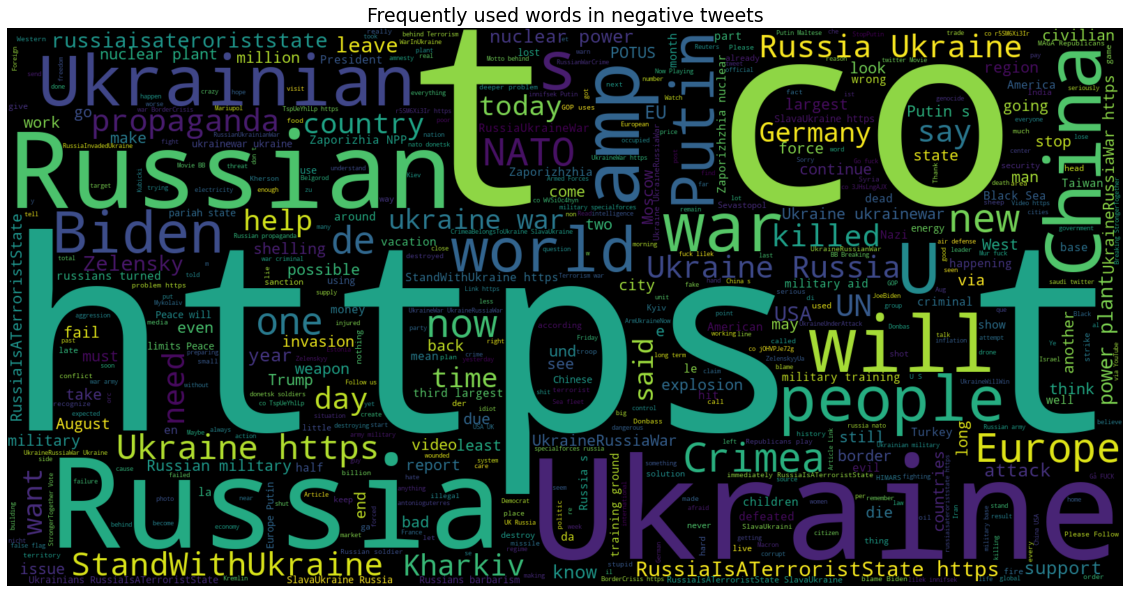

In [35]:
# Show the Frequently used words in the negative tweets

text = ' '.join([word for word in negative_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Frequently used words in negative tweets', fontsize=19)
plt.show()

In [34]:
#create dataframe for neutral tweets

neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,original_tweet_id,extractedts,polarity,sentiment
1,1,335041409,XclusivasPuebla,1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0,False,0,2022-08-19 07:51:50.523048,0.0,Neutral
31923,31923,838321345570156545,rogue_corq,1874,1864,669254,2017-03-05 09:32:38.000000,1560662550320074752,2022-08-19 16:18:42,0,ВСУ получили важные новые возможности благодар...,"[{'text': 'Russia', 'indices': [104, 111]}, {'...",ru,0,False,0,2022-08-19 19:38:03.108665,0.0,Neutral
31916,31916,256053751,JamestownTweets,1377,20209,27071,2011-02-22 15:22:18.000000,1560662532347826176,2022-08-19 16:18:38,1,Now accepting applications for our Fall 2022 #...,"[{'text': 'internships', 'indices': [45, 57]},...",en,1,False,0,2022-08-19 19:38:03.130992,0.0,Neutral
31914,31914,1252646596497436672,wRLMyxE7ZEr5CKr,32,3,607,2020-04-21 17:13:42.000000,1560662530695254018,2022-08-19 16:18:37,0,#Russia の兵隊達よ #Putin に従うな！\n直ちに武器を捨て家族の待つ家に帰れ！...,"[{'text': 'Russia', 'indices': [0, 7]}, {'text...",ja,0,False,0,2022-08-19 20:50:39.391974,0.0,Neutral
31913,31913,29123084,ArvadaRadio,156,16677,106245,2009-04-06 02:15:20.000000,1560662523728338945,2022-08-19 16:18:36,0,#StandWithUkraine \n \nhttps://t.co/3JHsLngAJX...,"[{'text': 'StandWithUkraine', 'indices': [0, 1...",en,0,False,0,2022-08-19 21:23:26.158985,0.0,Neutral


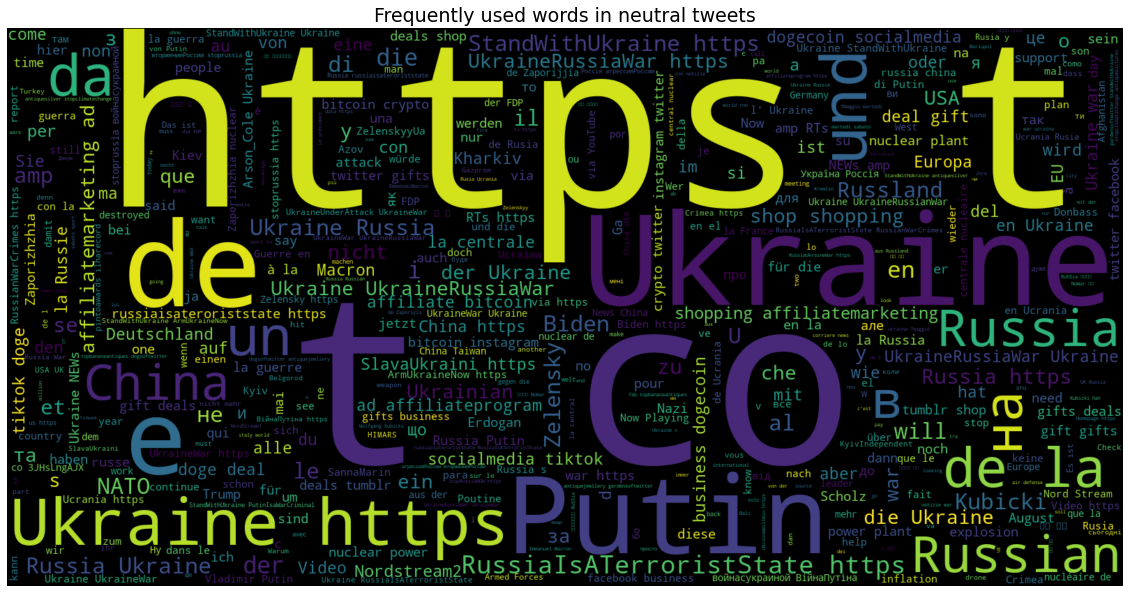

In [36]:
# Show the Frequently used words in the neutral tweets

text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Frequently used words in neutral tweets', fontsize=19)
plt.show()

In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [38]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

C:\Users\smbar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features: 716871

First 20 features:
 ['00', '00 00', '00 000', '00 01', '00 02', '00 03', '00 04', '00 05', '00 06', '00 07', '00 08', '00 09', '00 10', '00 11', '00 12', '00 13', '00 14', '00 15', '00 16', '00 17']


In [39]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (38084, 716871)
Size of y_train: (38084,)
Size of x_test: (9521, 716871)
Size of y_test: (9521,)


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.58%


In [44]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 739  270  153]
 [  54 6135   89]
 [ 103  323 1655]]


              precision    recall  f1-score   support

    Negative       0.82      0.64      0.72      1162
     Neutral       0.91      0.98      0.94      6278
    Positive       0.87      0.80      0.83      2081

    accuracy                           0.90      9521
   macro avg       0.87      0.80      0.83      9521
weighted avg       0.89      0.90      0.89      9521



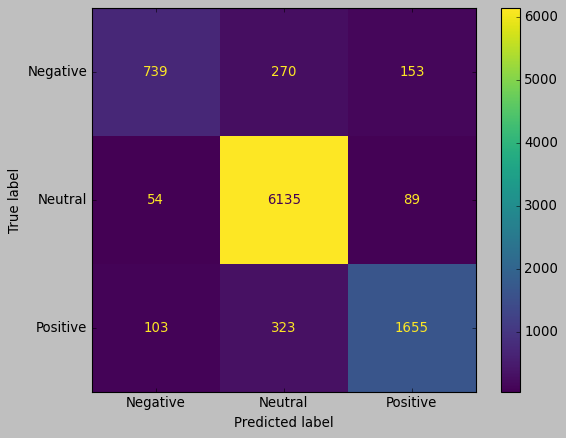

In [45]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [48]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [49]:
y_pred = grid.predict(x_test)

In [50]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.28%


In [51]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 772  242  148]
 [  49 6140   89]
 [ 106  291 1684]]


              precision    recall  f1-score   support

    Negative       0.83      0.66      0.74      1162
     Neutral       0.92      0.98      0.95      6278
    Positive       0.88      0.81      0.84      2081

    accuracy                           0.90      9521
   macro avg       0.88      0.82      0.84      9521
weighted avg       0.90      0.90      0.90      9521



In [52]:
from sklearn.svm import LinearSVC

In [53]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [54]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 91.06%


In [55]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 794  224  144]
 [  45 6158   75]
 [  99  264 1718]]


              precision    recall  f1-score   support

    Negative       0.85      0.68      0.76      1162
     Neutral       0.93      0.98      0.95      6278
    Positive       0.89      0.83      0.86      2081

    accuracy                           0.91      9521
   macro avg       0.89      0.83      0.85      9521
weighted avg       0.91      0.91      0.91      9521

